### Importing necessary libraries

In [5]:
import pandas as pd
import os

### Merging 12 months of sales data into a single CSV file.

In [6]:
#list all months in a new variable called 'files' using 'os.listdir'
files = [file for file in os.listdir("./Sales_Data")]

#create a new and empty data frame to store merged data
all_months_data =pd.DataFrame()

#iterate and combine the data with a for loop
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
#store new data in a csv file called "all_data"
all_months_data.to_csv("all_data.csv", index=False)



### Read the new data frame

<!-- Read new Data Frame -->

In [7]:
# read the new data into notebooks
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Cleaning up the data

##### Task 1: Dropping NaN values---> Display NaN values in a Data Frame.

In [8]:
#create a variable called NaN_df to display NaN values then use .isna() and .any() to iterate through the data and 
#locate the NaN values
NaN_df = all_data[all_data.isna().any(axis=1)]
NaN_df.head()

#drop all NaN values from the all_data DF by using drop.na()
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Task 2: Find the 'Or' error which is displayed when we try to convert to integers

In [9]:
#Instead of deleting the 'Or', we just get the data without the text 'Or' by using the 'is not equal to sign'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Task 3: Convert the columns needed to correct type

In [10]:
#converted the data in the 2 columns below into numeric data types by using the 'to_numeric' function.
all_data ['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data ['Price Each']= pd.to_numeric(all_data['Price Each'])


### Additional columns 

##### Adding a month column in order to answer the question below

In [11]:
#created a new column called 'Month' and added the month from the Order Date column which was on index 0 and 1
all_data['Month'] = all_data['Order Date'].str[0:2] 

# we converted the data in the Month column into an integer
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding a sales column

In [12]:
all_data ['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1: What was the best month for sales? & How much was earned that month?

In [13]:
#we start by grouping the data by 'Month' column then adding the values 
Results = all_data.groupby('Month').sum()['Sales']

C:\Users\user\AppData\Local\Temp/ipykernel_10128/5414379.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Results = all_data.groupby('Month').sum()['Sales']


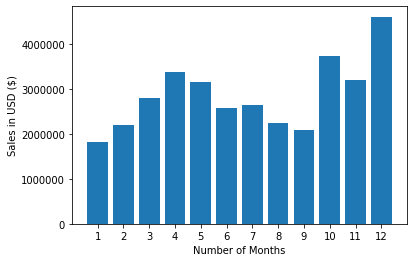

In [15]:
# Here we plot a bar chart to visualize the month with the best sales.
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, Results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Number of Months')
plt.ticklabel_format(style='plain')
plt.show()